In [1]:
from utils import parse_trajectory

file_path = "../test/traj.out"
traj_df = parse_trajectory(file_path)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def compute_msd(traj_df, timesteps):
    """
    Compute the Mean Squared Displacement (MSD) for the system.

    Args:
        traj_df: DataFrame containing trajectory data.
        timesteps: List of timesteps in the trajectory.

    Returns:
        msd_results: Dictionary with timesteps as keys and MSD values as values.
    """
    # Get the unique particle IDs
    particle_ids = traj_df["id"].unique()

    # Initialize storage for initial positions
    initial_positions = traj_df[traj_df["timestep"] == timesteps[0]][
        ["id", "x", "y", "z"]
    ].set_index("id")

    # MSD results storage
    msd_results = {}

    for t in timesteps:
        # Get positions at current timestep
        current_positions = traj_df[traj_df["timestep"] == t][
            ["id", "x", "y", "z"]
        ].set_index("id")

        # Compute displacements
        displacements = current_positions - initial_positions
        squared_displacements = (displacements**2).sum(axis=1)

        # Compute MSD
        msd_results[t] = squared_displacements.mean()

    return msd_results


def plot_msd(msd_results):
    """
    Plot the Mean Squared Displacement (MSD).

    Args:
        msd_results: Dictionary containing timestep and MSD values.
    """
    timesteps = list(msd_results.keys())
    msd_values = list(msd_results.values())

    # Plot MSD
    plt.figure(figsize=(8, 6))
    plt.plot(timesteps, msd_values, marker="o", label="MSD(t)")
    plt.xlabel("Time (Timestep)", fontsize=14)
    plt.ylabel("Mean Squared Displacement (MSD)", fontsize=14)
    plt.title("Mean Squared Displacement (MSD) Over Time", fontsize=16)
    plt.grid(alpha=0.4)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.savefig("MSD.png", dpi=300)
    plt.show()

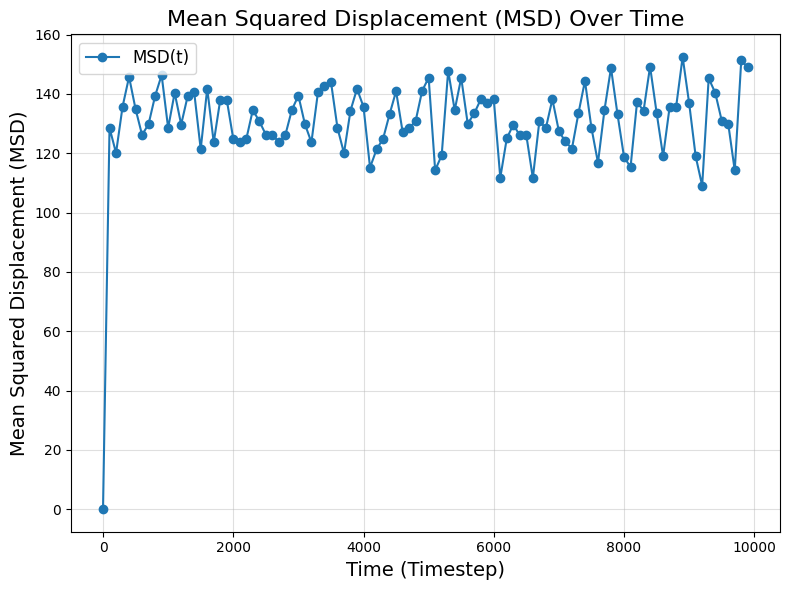

In [5]:
# Get unique timesteps
timesteps = sorted(traj_df["timestep"].unique())

# Compute MSD
msd_results = compute_msd(traj_df, timesteps)

# Plot MSD
plot_msd(msd_results)